In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")
import warnings
warnings.filterwarnings('ignore')

In [3]:
from quantumnetworks import SingleModeSystem, plot_full_evolution
import numpy as np

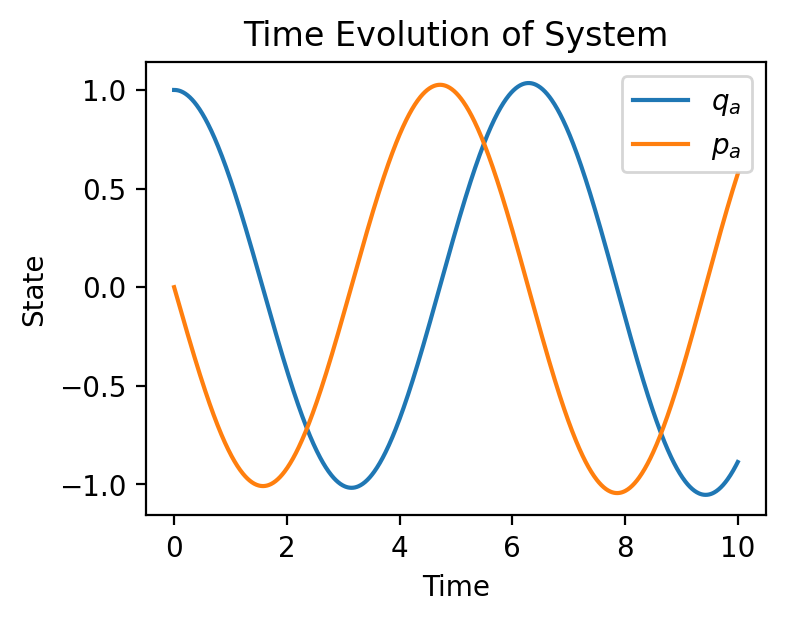

In [4]:
A_in = lambda t: 0
sys = SingleModeSystem(params={"omega_a": 1, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 10, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

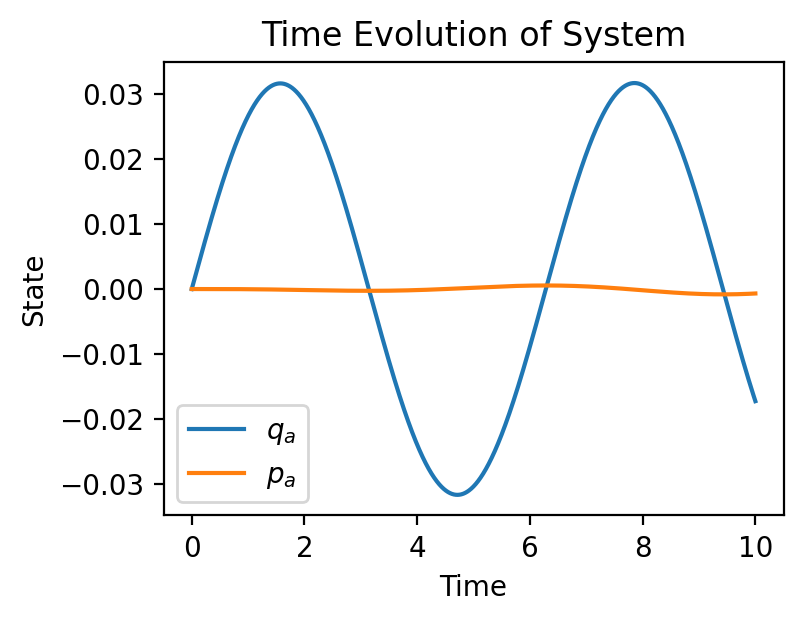

In [5]:
A_in = None #default A_in is used
sys = SingleModeSystem(params={"omega_a": 1, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 10, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = 10*X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [6]:
u = sys.eval_u(0)
sys.eval_Jf(x_0, u)

array([[ 5.e-04,  1.e+00],
       [-1.e+00,  5.e-04]])

In [7]:
sys.eval_Jf_numerical(x_0, u)

array([[ 5.e-04,  1.e+00],
       [-1.e+00,  5.e-04]])

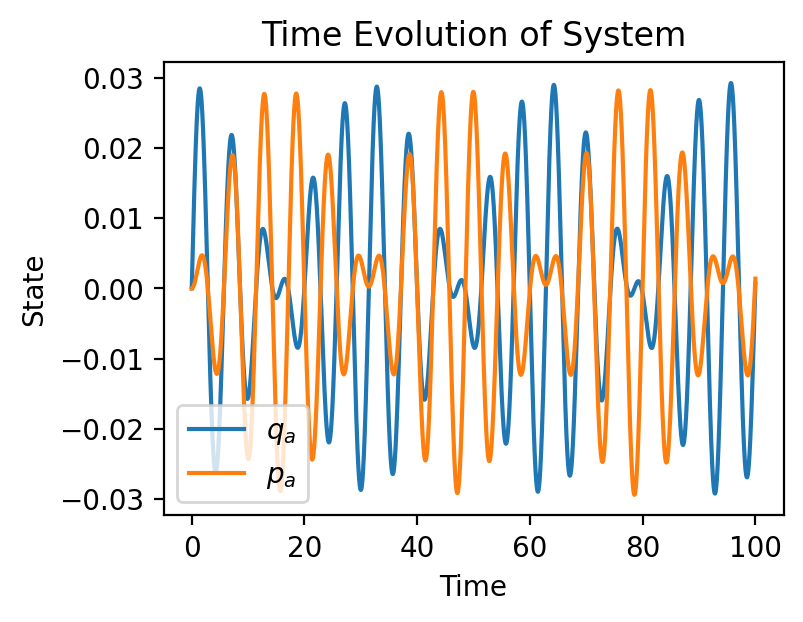

In [8]:
# detuned drive ramp up
omega_a = 1
delta = 0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 100, 1000001)
X = sys.forward_euler(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

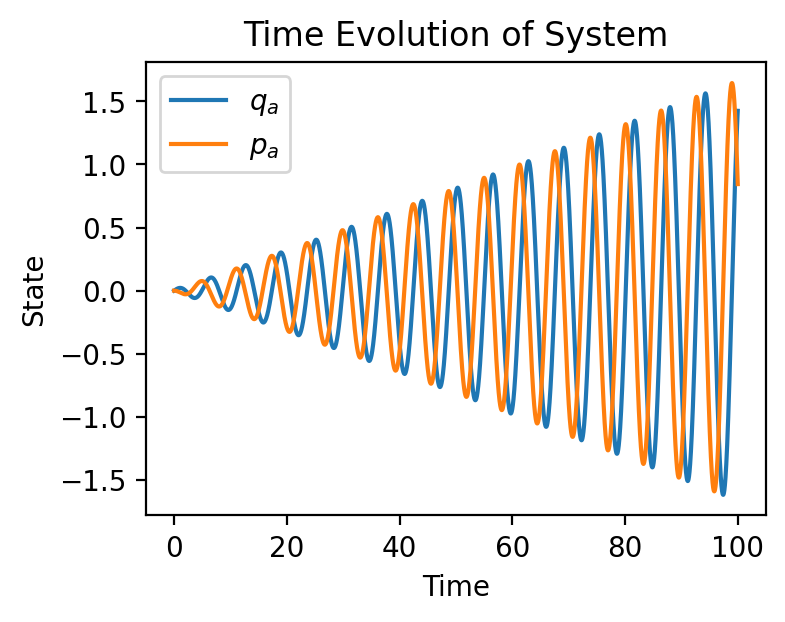

In [9]:
# ramp up on resonance
omega_a = 1
delta = 0.0
A_in = lambda t: np.cos((omega_a +delta)*t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 100, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

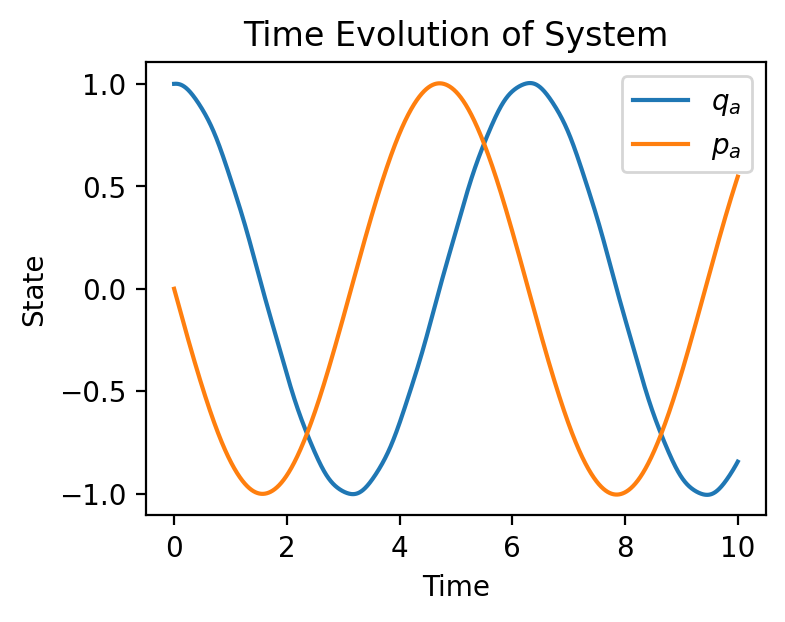

In [10]:
# RWA
omega_a = 1
delta = 10
A_in = lambda t: np.cos((omega_a +delta)*t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 10, 100001)
X = sys.forward_euler(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()